# Long-Horizon Forecasting with NHITS

https://nixtlaverse.nixtla.io/neuralforecast/docs/tutorials/longhorizon_nhits.html

In [ ]:
import pandas as pd
from datasetsforecast.long_horizon import LongHorizon

# Change this to your own data to try the model
Y_df, _, _ = LongHorizon.load(directory='./', group='ETTm2')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df

,unique_id,ds,y
0,HUFL,2016-07-01 00:00:00,-0.041413
1,HUFL,2016-07-01 00:15:00,-0.185467
2,HUFL,2016-07-01 00:30:00,-0.257495
3,HUFL,2016-07-01 00:45:00,-0.577510
4,HUFL,2016-07-01 01:00:00,-0.385501
...,...,...,...
403195,OT,2018-02-20 22:45:00,-1.581325
403196,OT,2018-02-20 23:00:00,-1.581325
403197,OT,2018-02-20 23:15:00,-1.581325
403198,OT,2018-02-20 23:30:00,-1.562328


In [ ]:
# For this excercise we are going to take 20% of the DataSet
n_time = len(Y_df.ds.unique())
val_size = int(.2 * n_time)
test_size = int(.2 * n_time)

Y_df.groupby('unique_id').head(2)

,unique_id,ds,y
0,HUFL,2016-07-01 00:00:00,-0.041413
1,HUFL,2016-07-01 00:15:00,-0.185467
57600,HULL,2016-07-01 00:00:00,0.040104
57601,HULL,2016-07-01 00:15:00,-0.214450
115200,LUFL,2016-07-01 00:00:00,0.695804
115201,LUFL,2016-07-01 00:15:00,0.434685
172800,LULL,2016-07-01 00:00:00,0.434430
172801,LULL,2016-07-01 00:15:00,0.428168
230400,MUFL,2016-07-01 00:00:00,-0.599211
230401,MUFL,2016-07-01 00:15:00,-0.658068


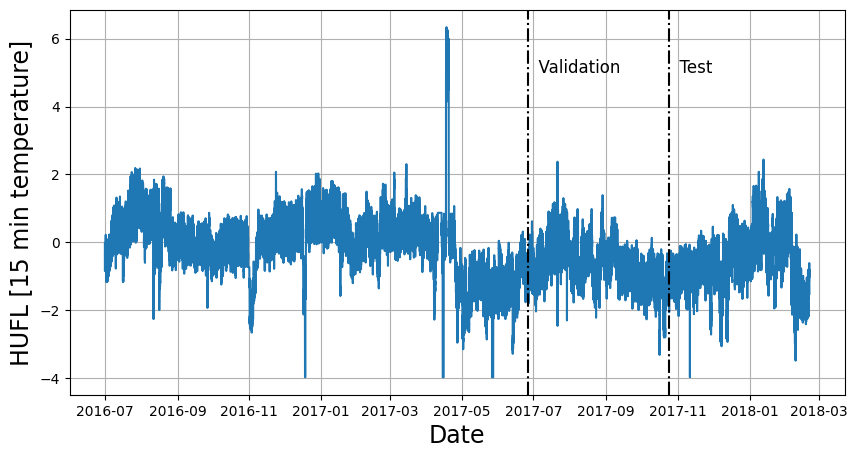

In [ ]:
import matplotlib.pyplot as plt

# We are going to plot the temperature of the transformer 
# and marking the validation and train splits
u_id = 'HUFL'
x_plot = pd.to_datetime(Y_df[Y_df.unique_id==u_id].ds)
y_plot = Y_df[Y_df.unique_id==u_id].y.values

x_val = x_plot[n_time - val_size - test_size]
x_test = x_plot[n_time - test_size]

fig = plt.figure(figsize=(10, 5))
fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.xlabel('Date', fontsize=17)
plt.ylabel('HUFL [15 min temperature]', fontsize=17)

plt.axvline(x_val, color='black', linestyle='-.')
plt.axvline(x_test, color='black', linestyle='-.')
plt.text(x_val, 5, '  Validation', fontsize=12)
plt.text(x_test, 5, '  Test', fontsize=12)

plt.grid()

In [ ]:
from neuralforecast.auto import AutoNHITS
from neuralforecast.core import NeuralForecast
from neuralforecast.losses.pytorch import MQLoss

In [ ]:
horizon = 96  # 24hrs = 96 * 15 min.

models = [AutoNHITS(h=horizon, loss=MQLoss(),  backend='optuna', num_samples=5)]

In [ ]:
nf = NeuralForecast(models=models, freq='15min')

Y_hat_df = nf.cross_validation(df=Y_df, val_size=val_size,
                               test_size=test_size, n_windows=None)

[I 2025-03-15 21:12:23,344] A new study created in memory with name: no-name-20e0f6f5-f5d1-48d3-a75a-19d8fad4636e
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [2, 2, 1] which is of type list.
  warnings.warn(message)
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 1, 1] which is of type list.
  warnings.warn(message)
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [2, 2, 2] which is of type list.
  warnings.warn(message)
/home/usr/miniconda3/envs/ca

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=600.0` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=600.0` reached.
[I 2025-03-15 21:12:47,882] Trial 0 finished with value: 85.08226013183594 and parameters: {'n_pool_kernel_size': [1, 1, 1], 'n_freq_downsample': [168, 24, 1], 'learning_rate': 0.03547108688030696, 'scaler_type': None, 'max_steps': 600.0, 'batch_size': 32, 'windows_batch_size': 512, 'random_seed': 3, 'input_size': 384, 'step_size': 1}. Best is trial 0 with value: 85.08226013183594.
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [2, 2, 1] which is of type list.
  warnings.warn(message)
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, fl

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=500.0` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500.0` reached.
[I 2025-03-15 21:13:08,534] Trial 1 finished with value: 0.3070538341999054 and parameters: {'n_pool_kernel_size': [8, 4, 1], 'n_freq_downsample': [24, 12, 1], 'learning_rate': 0.002250848801042586, 'scaler_type': 'standard', 'max_steps': 500.0, 'batch_size': 256, 'windows_batch_size': 512, 'random_seed': 20, 'input_size': 288, 'step_size': 1}. Best is trial 1 with value: 0.3070538341999054.
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [2, 2, 1] which is of type list.
  warnings.warn(message)
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, boo

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=700.0` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=700.0` reached.
[I 2025-03-15 21:13:31,643] Trial 2 finished with value: 0.37739691138267517 and parameters: {'n_pool_kernel_size': [2, 2, 1], 'n_freq_downsample': [180, 60, 1], 'learning_rate': 0.006422624614166706, 'scaler_type': None, 'max_steps': 700.0, 'batch_size': 32, 'windows_batch_size': 256, 'random_seed': 18, 'input_size': 288, 'step_size': 1}. Best is trial 1 with value: 0.3070538341999054.
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [2, 2, 1] which is of type list.
  warnings.warn(message)
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, in

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=1500.0` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1500.0` reached.
[I 2025-03-15 21:14:16,920] Trial 3 finished with value: 0.32108786702156067 and parameters: {'n_pool_kernel_size': [2, 2, 2], 'n_freq_downsample': [60, 8, 1], 'learning_rate': 0.005116017039970811, 'scaler_type': 'robust', 'max_steps': 1500.0, 'batch_size': 256, 'windows_batch_size': 256, 'random_seed': 18, 'input_size': 96, 'step_size': 1}. Best is trial 1 with value: 0.3070538341999054.
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [2, 2, 1] which is of type list.
  warnings.warn(message)
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, boo

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=700.0` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=700.0` reached.
[I 2025-03-15 21:14:30,190] Trial 4 finished with value: 1.3316575288772583 and parameters: {'n_pool_kernel_size': [8, 4, 1], 'n_freq_downsample': [180, 60, 1], 'learning_rate': 0.03975103095670081, 'scaler_type': 'standard', 'max_steps': 700.0, 'batch_size': 32, 'windows_batch_size': 512, 'random_seed': 6, 'input_size': 384, 'step_size': 96}. Best is trial 1 with value: 0.3070538341999054.
INFO:lightning_fabric.utilities.seed:Seed set to 20
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.acc

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=500.0` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500.0` reached.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
best_trial = nf.models[0].results.best_trial
print(f"Best trial: {best_trial.number}")
print(f"Value (objective function): {best_trial.value}")
print(f"Parameters: {best_trial.params}")

Best trial: 1
Value (objective function): 0.3070538341999054
Parameters: {'n_pool_kernel_size': [8, 4, 1], 'n_freq_downsample': [24, 12, 1], 'learning_rate': 0.002250848801042586, 'scaler_type': 'standard', 'max_steps': 500.0, 'batch_size': 256, 'windows_batch_size': 512, 'random_seed': 20, 'input_size': 288, 'step_size': 1}


In [ ]:
Y_hat_df.columns = Y_hat_df.columns.str.replace('-median', '')
Y_hat_df

,unique_id,ds,cutoff,AutoNHITS,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90,y
0,HUFL,2017-10-24 00:00:00,2017-10-23 23:45:00,-0.892039,-1.496915,-1.311454,-0.723876,-0.707849,-0.977673
1,HUFL,2017-10-24 00:15:00,2017-10-23 23:45:00,-0.919822,-1.596120,-1.390101,-0.747050,-0.727429,-0.865620
2,HUFL,2017-10-24 00:30:00,2017-10-23 23:45:00,-0.966974,-1.654759,-1.460952,-0.775025,-0.757620,-0.961624
3,HUFL,2017-10-24 00:45:00,2017-10-23 23:45:00,-1.002369,-1.713879,-1.519523,-0.817195,-0.797066,-1.049700
4,HUFL,2017-10-24 01:00:00,2017-10-23 23:45:00,-1.057971,-1.756422,-1.558585,-0.833810,-0.825810,-0.953600
...,...,...,...,...,...,...,...,...,...
7677595,OT,2018-02-20 22:45:00,2018-02-19 23:45:00,-1.178565,-1.484330,-1.395332,-0.893058,-0.835704,-1.581325
7677596,OT,2018-02-20 23:00:00,2018-02-19 23:45:00,-1.182840,-1.492266,-1.400619,-0.896110,-0.836810,-1.581325
7677597,OT,2018-02-20 23:15:00,2018-02-19 23:45:00,-1.188599,-1.493214,-1.398669,-0.902427,-0.841857,-1.581325
7677598,OT,2018-02-20 23:30:00,2018-02-19 23:45:00,-1.189552,-1.495806,-1.402574,-0.909007,-0.844272,-1.562328


In [ ]:
y_true = Y_hat_df.y.values
y_hat = Y_hat_df['AutoNHITS'].values

n_series = len(Y_df.unique_id.unique())

y_true = y_true.reshape(n_series, -1, horizon)
y_hat = y_hat.reshape(n_series, -1, horizon)

print('Parsed results')
print('2. y_true.shape (n_series, n_windows, n_time_out):\t', y_true.shape)
print('2. y_hat.shape  (n_series, n_windows, n_time_out):\t', y_hat.shape)

Parsed results
2. y_true.shape (n_series, n_windows, n_time_out):	 (7, 11425, 96)
2. y_hat.shape  (n_series, n_windows, n_time_out):	 (7, 11425, 96)


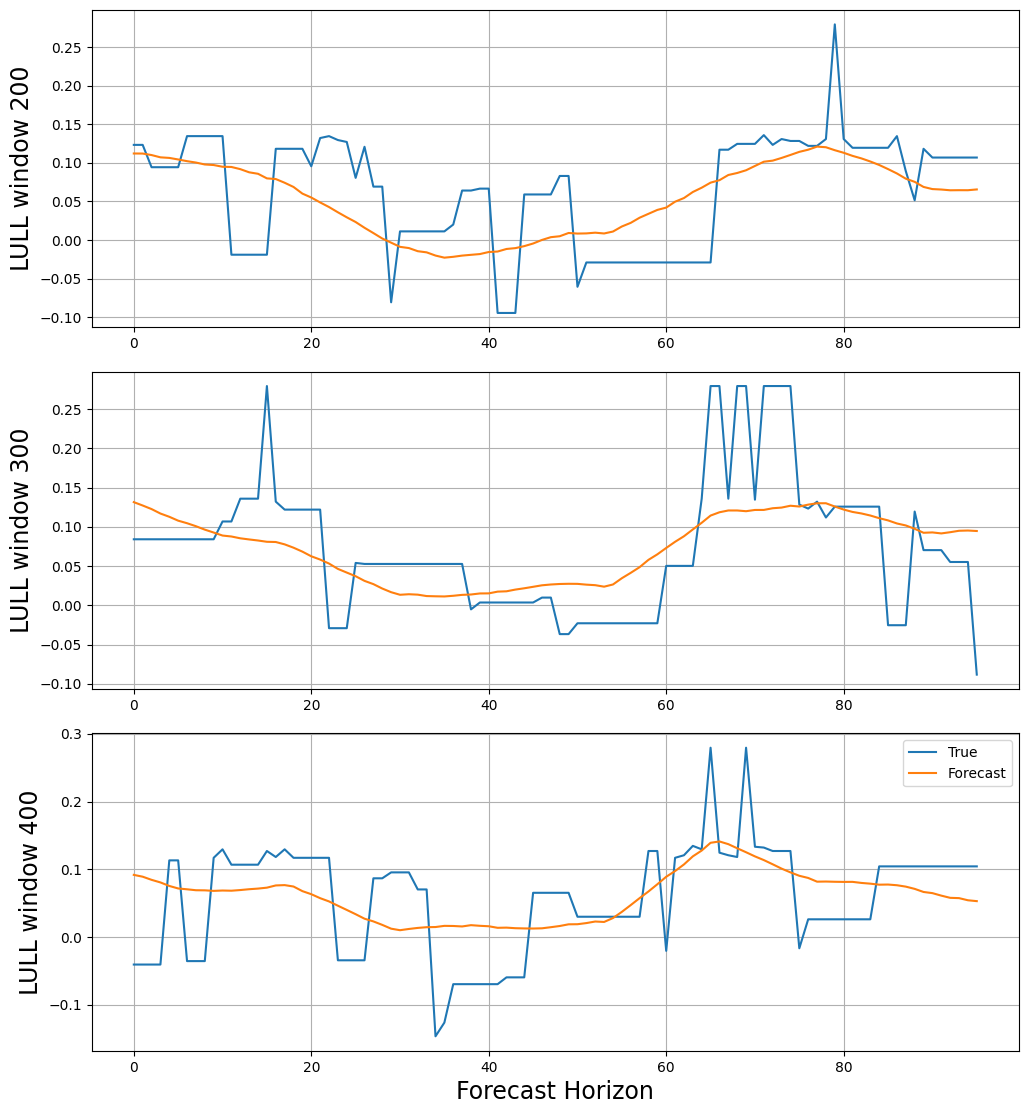

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 11))
fig.tight_layout()

series = ['HUFL','HULL','LUFL','LULL','MUFL','MULL','OT']
series_idx = 3

for idx, w_idx in enumerate([200, 300, 400]):
  axs[idx].plot(y_true[series_idx, w_idx,:],label='True')
  axs[idx].plot(y_hat[series_idx, w_idx,:],label='Forecast')
  axs[idx].grid()
  axs[idx].set_ylabel(series[series_idx]+f' window {w_idx}', 
                      fontsize=17)
  if idx==2:
    axs[idx].set_xlabel('Forecast Horizon', fontsize=17)
plt.legend()
plt.show()
plt.close()

In [ ]:
from neuralforecast.losses.numpy import mae, mse

print('MAE: ', mae(y_hat, y_true))
print('MSE: ', mse(y_hat, y_true))

MAE:  0.2509128204102632
MSE:  0.17162087611033974
